### Monte Carlo Simulation of Total Recycled Plastic Waste

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import median

$$ Recycled_t  = \sum_{x = 0}^{t}n_x * P $$
n = Units sold\
P = Plastic(kg) per unit

In [2]:
benchmark =  4000000
months = 60

#inputs for fixed variables
#P = 0.65

In [3]:
#inputs for moving variables and variance
n = 100000
mu_n, sigma_n = 0.00576, 0.1111

In [4]:
num_simulations = 10000

##### Profit Function

In [5]:
def recycle(P):
    n_sim = (1 + np.random.normal(mu_n, sigma_n, months)).cumprod()

    y = ((n*n_sim)*P).cumsum()
    
    return y

##### Bayesian Optimisation Minimal Amount of Plastic per Brick to Achieve Benchmark

In [9]:
def recycle_eval(P):
    end_recycle = []
    for i in range(num_simulations):
        y = recycle(P)
        end_recycle.append(y[-1])
        
    x = median(end_recycle) - benchmark
    if x<0: x = 999999
    return -x

In [10]:
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

recycle_bo = BayesianOptimization(recycle_eval, {'P' : (0.5, 1.5)})
                              
# init_points=20, n_iter=100 for final pred
recycle_bo.maximize(init_points=20, n_iter=100, acq='ei')

|   iter    |  target   |     P     |
-------------------------------------
|  1        | -2.975e+0 |  1.139    |
|  2        | -1.812e+0 |  0.9477   |
|  3        | -2.072e+0 |  0.9818   |
|  4        | -4.605e+0 |  1.391    |
|  5        | -8.71e+05 |  0.7935   |
|  6        | -4.738e+0 |  1.416    |
|  7        | -6.139e+0 |  0.7453   |
|  8        | -4.339e+0 |  1.348    |
|  9        | -2.454e+0 |  1.047    |
|  10       | -1e+06    |  0.5933   |
|  11       | -1.262e+0 |  0.8493   |
|  12       | -2.841e+0 |  0.6974   |
|  13       | -1e+06    |  0.5133   |
|  14       | -1e+06    |  0.5015   |
|  15       | -4.982e+0 |  1.443    |
|  16       | -2.963e+0 |  1.122    |
|  17       | -1e+06    |  0.6289   |
|  18       | -1e+06    |  0.5018   |
|  19       | -1e+06    |  0.5196   |
|  20       | -1.216e+0 |  0.8518   |
|  21       | -2.249e+0 |  0.6856   |
|  22       | -1.849e+0 |  0.6801   |
|  23       | -1.408e+0 |  0.6729   |
|  24       | -1.665e+0 |  0.6697   |
|  25       

In [12]:
print("Minimum Polyethylene Composition: ", recycle_bo.max, " kg")

Minimum Polyethylene Composition:  {'target': -4535.1547437328845, 'params': {'P': 0.652210168973029}}  kg


##### Monte Carlo Simulation with Graph

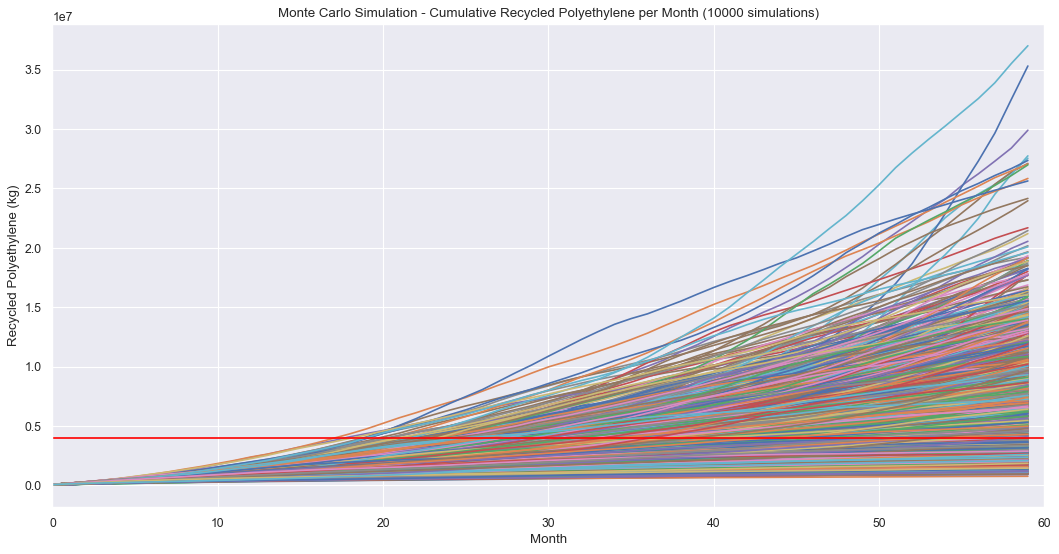

In [16]:
P = 0.65

end_recycle = []

plt.figure(figsize=(16, 8), dpi=80)

for i in range(num_simulations):
    y = recycle(P)
    
    end_recycle.append(y[-1])
    
    plt.title("Monte Carlo Simulation - Cumulative Recycled Polyethylene per Month (" + str(num_simulations) + " simulations)")
    plt.xlabel("Month")
    plt.ylabel("Recycled Polyethylene (kg)")
    plt.xlim([0, months])
    plt.plot(y)
    
plt.axhline(benchmark, c='red')

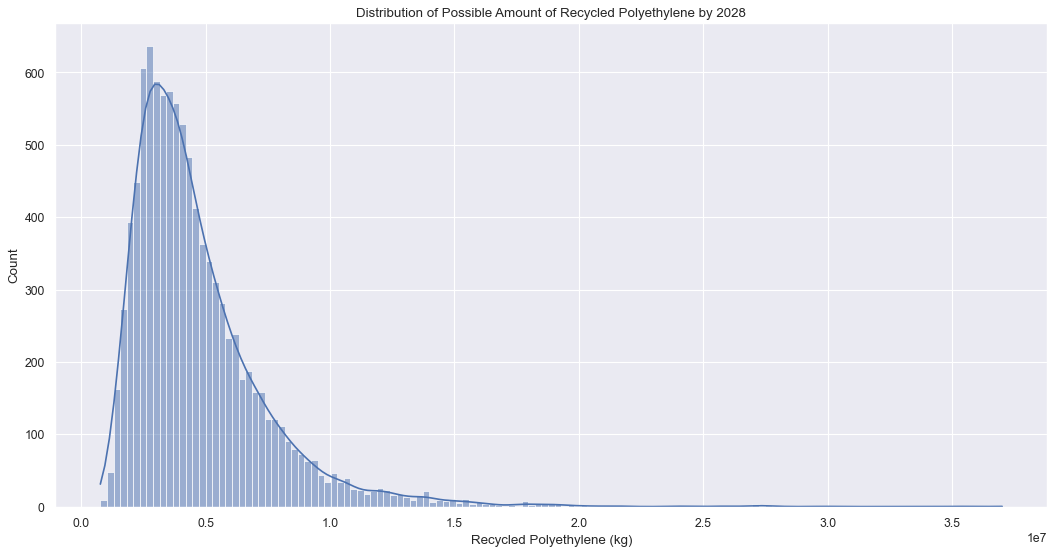

In [17]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="darkgrid")
sns.histplot(end_recycle, kde=True)
plt.title("Distribution of Possible Amount of Recycled Polyethylene by 2028")
plt.xlabel("Recycled Polyethylene (kg)")
plt.show()

In [18]:
prob = (sum(x > benchmark for x in end_recycle)/len(end_recycle))

In [19]:
print("The probability of recycling above benchmark is:")
print("2028: " + str(prob*100) + "%")

The probability of recycling above benchmark is:
2028: 50.11%
